**Statistical Analysis**

This code is for the A/B test in project 3. 
By Team UXplorers

In [1]:
# import necessary packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
from numpy import random
from scipy import stats
from scipy.stats import chi2_contingency

warnings.simplefilter("ignore")

In [2]:
# prepare dataset: add some synthetic data to the Kaggle dataset
# https://github.com/TheErdosInstitute/ux-research-summer-2025/blob/main/basic_statistical_analysis.ipynb

df = pd.read_csv('C:/Users/zhuda/OneDrive - The Ohio State University/Erdos Institute/ux-research-summer-2025/AB_Test_Results.csv')

In [3]:
df

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


In [4]:
# separate into two groups
control = df['REVENUE'][df['VARIANT_NAME'] == 'control']
variant = df['REVENUE'][df['VARIANT_NAME'] == 'variant']

# conduct independent sample t-test
t_statistic, p_value = stats.ttest_ind(control, variant)
print(f"T-statistic: {t_statistic:.3f}, P-value: {p_value:.3f}")

T-statistic: 1.271, P-value: 0.204


In [5]:
print(np.mean(control))
print(np.mean(variant))
print(np.max(control))
print(np.max(variant))

0.12901284109149277
0.07006977671451356
196.01
58.63


However, we want to check the data distribution and normality first to choose proper statistical tests.

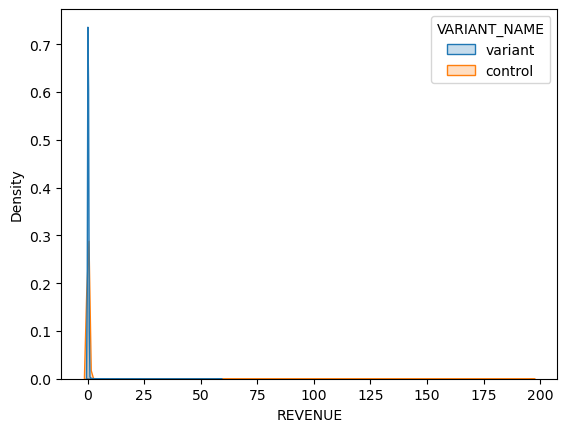

In [14]:
# create a density plot of the data
fig = sns.kdeplot(data=df, x='REVENUE', hue='VARIANT_NAME', shade=True)
#fig.set_xlim(500,525)
plt.show()

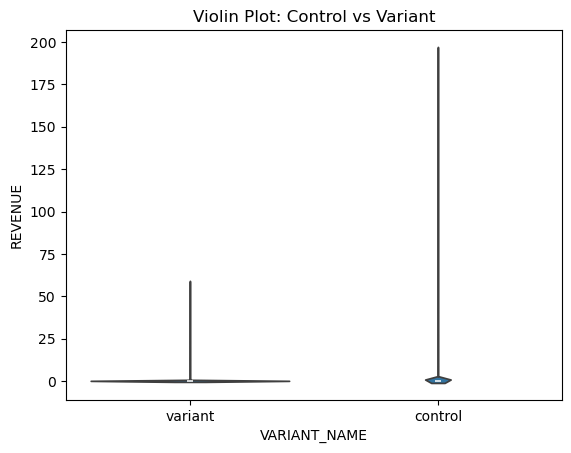

In [19]:
sns.violinplot(x='VARIANT_NAME', y='REVENUE', data=df)
plt.title('Violin Plot: Control vs Variant')
plt.show()

In [6]:
# check normality
_, p_a = stats.shapiro(control)
_, p_b = stats.shapiro(variant)
print(f"Normality p-values: Control={p_a:.3f}, Variant={p_b:.3f}")

Normality p-values: Control=0.000, Variant=0.000


Since both p-value are smaller than 0.05, we use Mann-Whitney U test.

In [7]:
#try non-parametric version t-test: Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(control, variant, alternative='two-sided')
print(f"U-statistic: {u_stat}, P-value: {p_value:.3f}")

U-statistic: 12521564.0, P-value: 0.478


p > 0.05, fail to reject the null